# 빅데이터04-기술통계 

- 데이터 읽기 및 탐색
- 표본 추출
- 데이터(변수) 종류 별 통계 : nominal-도수, numeric-기술통계
- 1변수 분석 : 평균 분석 등
- 결측치, outlier 

## 데이터 읽기 

- 타이타닉 탑승객 데이터 
- seaborn 라이브러리에 데이터가 포함되어 있음

In [5]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 데이터 보기

- 필드 정의(설명서)확보
- 기본정보 획득 : df.info()
- 실제 데이터 보기 : 엑셀, df.head()


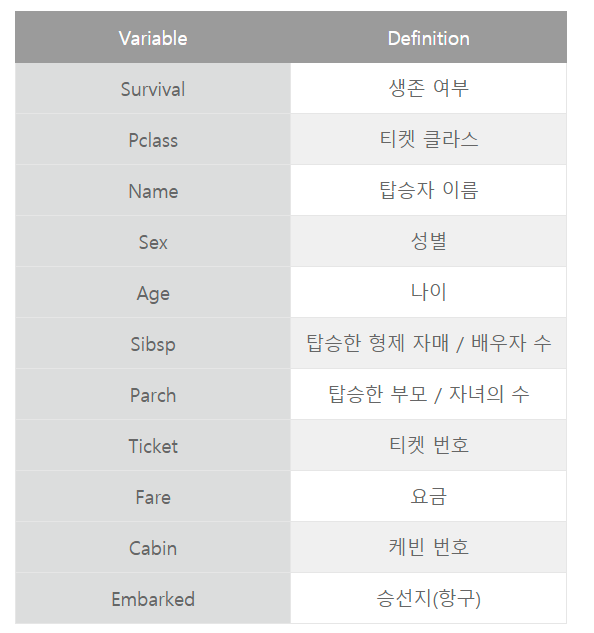

In [221]:
# 데이터 타입 조회 
# non-null count 주목
# object == string

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


- excel
    - DF.to_csv( 파일명 )  : csv 파일로 저장하기

In [222]:
titanic.to_csv("titanic.csv", index = False) 

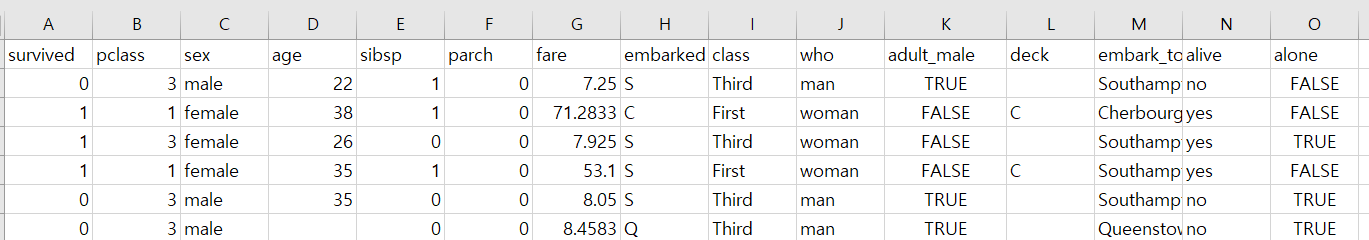


- pandas data 보기

In [223]:
# 읽어 들인 데이터 보기

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- pandas data type 조회 :  df.dtypes, col.dtype

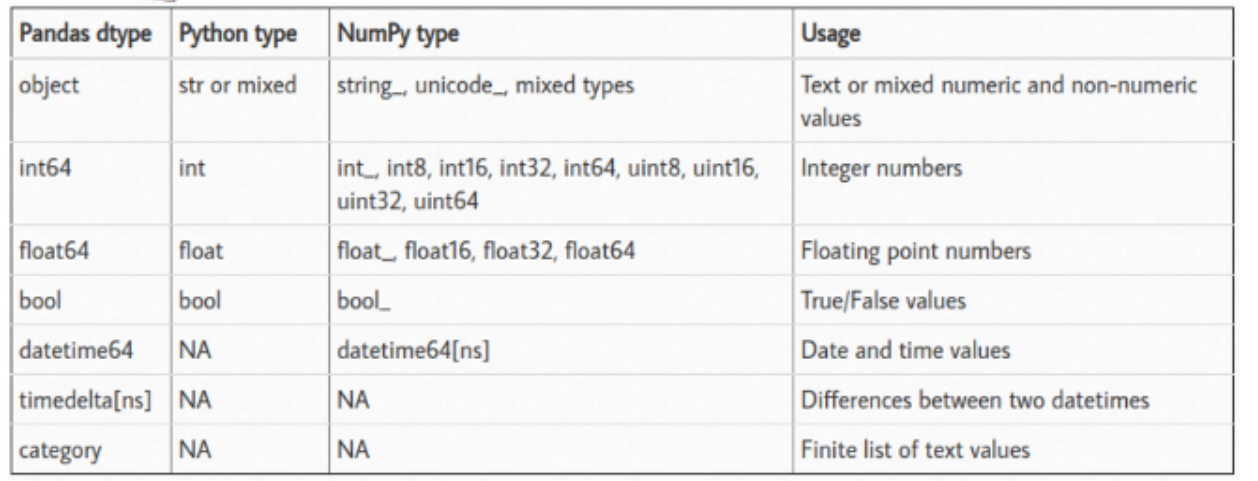

In [8]:
print(titanic['survived'].dtype)

int64


In [20]:
print(titanic.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [10]:
#test

import numpy as np
print(titanic['survived'].dtype == np.int64)

True


In [12]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [13]:
# test 2

for c in titanic.columns : 
    print(titanic[c].dtype == np.int64)

True
True
False
False
True
True
False
False
False
False
False
False
False
False
False


In [37]:
# filtering or selecting
titanic.dtypes[titanic.dtypes != np.int64]

sex              object
age             float64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

- type 변환 : 객체.astype( new type) 

In [19]:
titanic['survived'].astype(float)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: survived, Length: 891, dtype: float64

In [16]:
titanic['age'].astype(int)  # error 남 => 아래 data cleansing에서 설명
# 문제: NaN 값이 존재하기 때문에 형변환 할 수 없음
# 해결: 결측치 제거 `dropna`

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

## 기본 통계  -  nominal 

- 도수 세기
- 도수의 % 
- 시각화

### 도수세기 
- df.컬럼명.value_counts() or df['컬럼명'].value_counts()
- %로 나타내기 : normalize=True

In [21]:
# 성별 count
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [24]:
#  성별 count %
titanic.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [25]:
# 모든 컬럼에 대해 count 보기 
print(titanic.columns)  # 컬럼 이름 보기 
for c in titanic.columns : 
    print(titanic[c].value_counts())

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: in

### 과제1 : 의미상 nominal 인 column 만 count 하기
- 튀는 값들이 있는 것들 삭제 -> fare, age
    - fare: 35.0000, 28.5000 등 이상한 값 있음
    - age: 36.50, 55.50 등 이상한 값이 있음

In [33]:
for c in titanic.columns :
    if c != 'fare' and c != 'age' :
        print(titanic[c].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
no     549
yes    342
Name: alive, dtype: int64
True     537
False    354
Name: alone, dtype: int64


### 도수의 시각화
- bar or pie :    count().plot ( kind='bar' or 'pie')

<Axes: >

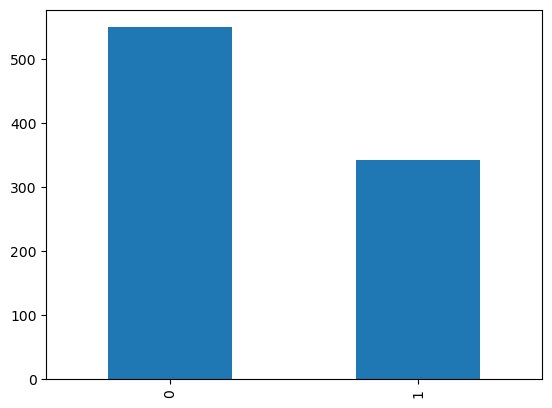

In [34]:
import matplotlib.pyplot as plt

# 생존자 사망자  
titanic.survived.value_counts().plot(kind='bar')

<Axes: ylabel='survived'>

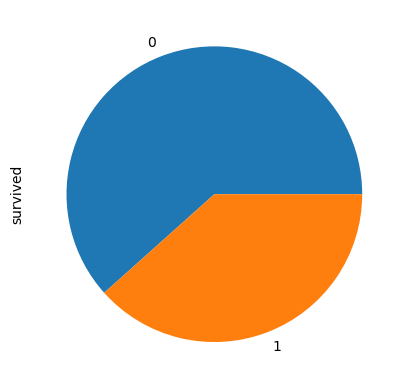

In [35]:
# pie
titanic.survived.value_counts().plot(kind='pie')

- seaborn 라이브러리 함수 : countplot
     - countplot (컬럼, data=데이터)
     - 좀 더 모양이 예쁘고 다양한 parameter가 있음

<Axes: xlabel='survived', ylabel='count'>

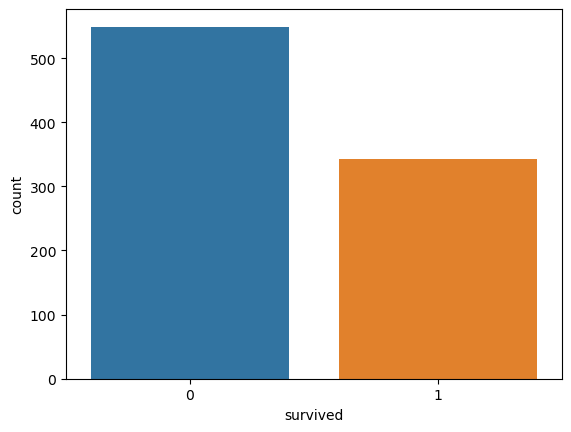

In [36]:
sns.countplot(x='survived', data=titanic)

## 표본 추출 

빅데이터는 전수처리가 기본이지만 test, 비식별화 등의 용도로 undersampling 을 학습데이터 증강 등의 용도로 oversampling을 할 수 있다.
- 단순 추출
- 층화 추출 
- Over sampling 

###  1) 단순 추출

- df.sample(n=추출 개수, frac=추출 비율, replace=중복추출여부, random_state=랜덤시드, ignore_index=새로 인덱스 부여 여부)
    - 랜덤시드를 같게 주면 같게 추출이됨

In [38]:
titanic.sample(frac=0.5, random_state=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
223,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
84,1,2,female,17.0,0,0,10.5000,S,Second,woman,False,NaN,Southampton,yes,True
680,0,3,female,NaN,0,0,8.1375,Q,Third,woman,False,NaN,Queenstown,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0,3,male,40.5,0,2,14.5000,S,Third,man,True,NaN,Southampton,no,False
396,0,3,female,31.0,0,0,7.8542,S,Third,woman,False,NaN,Southampton,no,True
612,1,3,female,NaN,1,0,15.5000,Q,Third,woman,False,NaN,Queenstown,yes,False
304,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- weights= numeric 필드명  : 값이 클 수록 뽑힐 확률이 높음

In [41]:
print(titanic.sample(frac=0.5, random_state=1, weights='age')['age'].mean())
print(titanic.sample(frac=0.5, random_state=1)['age'].mean())

34.2017937219731
28.46254189944134


###  2) 층화 추출
- 특정 nominal 필드의 비율 분포를 유지하면서 추출
- train_data, test_data = train_test_split(데이터, test_size=0.1, random_state=1, stratify=필드)

In [42]:
print("org data:\n", titanic['sex'].value_counts(normalize=True))

print("\n0.1 sample:\n", titanic.sample(frac=0.1, random_state=1)['sex'].value_counts(normalize=True))
      
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(titanic, test_size=0.1, random_state=1, stratify=titanic['sex'])
print ("\nstratified sample:\n", test_data.sex.value_counts(normalize=True))

org data:
 male      0.647587
female    0.352413
Name: sex, dtype: float64

0.1 sample:
 male      0.640449
female    0.359551
Name: sex, dtype: float64

stratified sample:
 male      0.644444
female    0.355556
Name: sex, dtype: float64


- 복수의 필드를 stratify하기 위해서는 combined 필드를 만들어서 해야 함
    - string concat

### 과제 2 : pclass와 alive 필드를 이용해 0.5 비율을 층화추출하시오
- pclass, alive 필드를 concat한 컬럼을 생성
- 생성된 컬럼을 기준으로 층화추출

In [6]:
titanic['combined'] = titanic.pclass.astype('str') + titanic.alive

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(titanic, test_size=0.5, random_state=2, stratify=titanic['combined'])

# 결합한 필드에 대한 비율은 필요 없음
# 원본과 층화추출 된 값 비교 -> 거의 비슷
print ("\nstratified sample:\n", test_data.pclass.value_counts(normalize=True))
print ("\noriginal sample:\n", titanic.pclass.value_counts(normalize=True))


stratified sample:
 3    0.551570
1    0.242152
2    0.206278
Name: pclass, dtype: float64

original sample:
 3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


###  3) over sampling
- 단순히 copy (duplication) 하는 방법 
- 원래 통계분포를 유지하며 데이터 생성 (비식별화 방법으로도 사용)
    - 원래 데이터 분포를 학습하여 모델만들기
    - 모델로 부터 데이터 생성(재현)

- CTGAN
    - Continuous data must be represented as floats
    - Discrete data must be represented as ints or strings
    - The data should not contain any missing values

In [79]:
!pip install ctgan

In [116]:
from ctgan import CTGAN

# 제외
titanic=titanic.dropna(subset=['age', 'embarked'])  # 결측치 제거
titanicsub=titanic.drop(columns=['class', 'deck', 'combined'])  # 제외

discrete_columns = ['pclass', 'sex', 'embarked', 'who','adult_male', 'embark_town', 'alive', 'alone']  # nominal 필드 지정 필요

ctgan = CTGAN(epochs=10)


ctgan.fit(titanicsub, discrete_columns)  # 모델링 
synthetic_data = ctgan.sample(1000)  # 생성
synthetic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
0,1,3,female,-5.905678,0,0,-0.273792,S,child,False,Southampton,no,False
1,1,3,female,18.041150,0,2,16.657659,S,man,False,Southampton,yes,True
2,0,3,female,40.013294,0,1,65.687230,Q,child,True,Southampton,no,False
3,0,2,female,41.350686,1,1,102.528884,Q,woman,True,Queenstown,yes,True
4,1,3,female,-1.923654,4,2,6.996584,S,man,False,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,female,34.472688,4,2,115.481828,S,man,False,Queenstown,yes,False
996,0,3,male,32.162426,1,2,27.150129,S,woman,False,Southampton,yes,True
997,1,3,male,31.896684,2,0,5.400473,C,woman,False,Southampton,yes,False
998,0,1,female,31.109832,3,0,5.443671,S,man,True,Cherbourg,no,False


##  Numeric data

- 기술 통계
- 평균 vs. 중간값
- quartile , IQR
- 시각화
- outlier

### 1) 기술 통계

- df.describe() : 기술
- 데이터에 대한 가장 기본적 분석 : 범위, 최대, 최소, 평균


In [81]:
# numeric data 기술 통계 보기
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### 2) 평균 vs. 중간값

- 평균을 구하는 것은 데이터에 대해 가장 기본적인 분석
- 평균은 특이값에 영향을 많이 받음 

In [90]:
import numpy as np
np.mean([52, 53, 60, 64, 76])

61.0

In [91]:
np.mean([52, 53, 60, 64, 76, 500 ])

134.16666666666666

- 중간값 : 특이값에 크게 영향 받는 것을 보완

In [92]:
# 홀수개 데이터면 가운데값
np.median([52, 53, 60, 64, 76])

60.0

In [93]:
# 데이터가 짝수개 이면 가운데 2 값의 평균
np.median([52, 53, 60, 64, 76, 500 ])

62.0

### 3) quartile , IQR
- Quartile : 1/4 단위로 자른 0%, 25%, 50%, 75% , 100% 의 값  
- Quantile : 100% 중에 어느 값
- IQR : 25~75% 의 범위 => 극단값에 영향을 받지 않는 중간 50% 의 범위를 의미

In [94]:
titanic['age'].quantile(0.5)

28.0

In [95]:
titanic['age'].median()

28.0

In [96]:
titanic['age'].quantile(0.99)

65.87

### 4) 수치 데이터 시각화1 - boxplot 

- 값의 분포를 볼 수 있다
- 중간값, outlier 등을 확인

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb02090b760>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb02090b640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0209355b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb02090b790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb02090ba90>],
 'means': []}

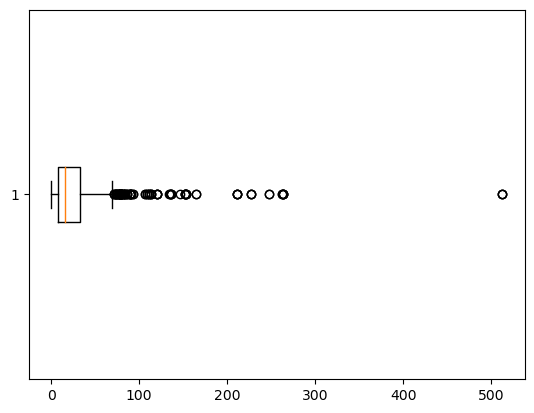

In [108]:
# numeric data 요금 분포 보기
plt.boxplot(titanic.fare, vert=False)

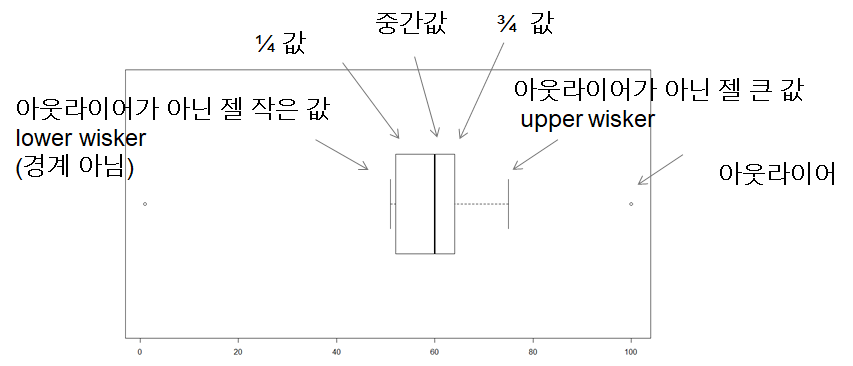

### 5) outlier 

- 값이 다른 데이터 분포를 크게 벗어나는 데이터 
- 평균 등에 큰 영향을 줌
- 처리상의 오류일 수도 있고, 진짜 큰 값일 수도 있다  (몸무게 300kg vs. 500kg, 연매출 1조 vs 8000조) 
- 통계적 정의(by John Tukey) 
    - `25% 값 -1.5 X IQR` 보다 작은 값 
    - `75% 값 +1.5 X IQR` 보다 큰 값

### 과제 3 : fare 의 통계적 outlier를 구하여 filtering (outlier인 값만 출력) 하시오 

In [155]:
IQR = titanic['fare'].quantile(0.75) - titanic['fare'].quantile(0.25)
left = titanic['fare'].quantile(0.25) - 1.5 * IQR
right = titanic['fare'].quantile(0.75) + 1.5 * IQR

for f in titanic['fare'] :
    if f < left or f > right :
        print(f, end=' ')

71.2833 263.0 146.5208 82.1708 76.7292 80.0 83.475 73.5 263.0 77.2875 247.5208 73.5 77.2875 79.2 66.6 69.55 69.55 146.5208 69.55 113.275 76.2917 90.0 83.475 90.0 79.2 86.5 512.3292 79.65 153.4625 135.6333 77.9583 78.85 91.0792 151.55 247.5208 151.55 110.8833 108.9 83.1583 262.375 164.8667 134.5 69.55 135.6333 153.4625 133.65 66.6 134.5 263.0 75.25 69.3 135.6333 82.1708 211.5 227.525 73.5 120.0 113.275 90.0 120.0 263.0 81.8583 89.1042 91.0792 90.0 78.2667 151.55 86.5 108.9 93.5 221.7792 106.425 71.0 106.425 110.8833 227.525 79.65 110.8833 79.65 79.2 78.2667 153.4625 77.9583 69.3 76.7292 73.5 113.275 133.65 73.5 512.3292 76.7292 211.3375 110.8833 227.525 151.55 227.525 211.3375 512.3292 78.85 262.375 71.0 86.5 120.0 77.9583 211.3375 79.2 69.55 120.0 93.5 80.0 83.1583 69.55 89.1042 164.8667 69.55 83.1583 

### 과제4 : numeric column 들의 boxplot을 한 그림에 그리시오

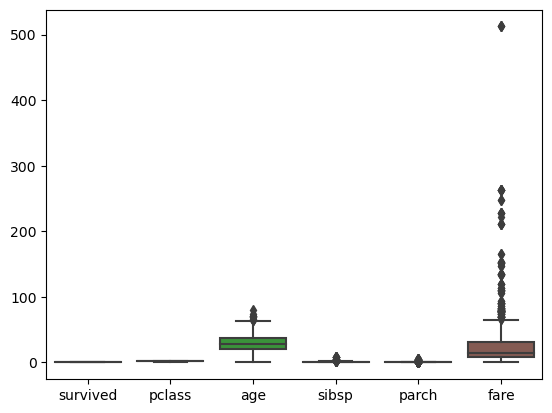

In [257]:
import numpy as np
import seaborn as sns
sns.boxplot(data=titanic[['survived','pclass','age','sibsp','parch','fare']])
plt.show()

In [54]:
# 참고) numeric column 찾기
import seaborn as sns
import numpy as np
titanic = sns.load_dataset("titanic")
print(list(titanic.describe().columns))

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


### 6) 수치 데이터 시각화2 
- numeric (continuous) data => 구간화 (bin) 해서 출력 
- countplot 으로 출력하는 경우  : 동일 값이 많이 나오면 그걸 보여주기는 하지만 어느 부분에 분포가 많이 되어 있는지와는 또 다르다
- 정수 데이터와 실수 데이터는 또 양상이 다르다

<Axes: xlabel='fare', ylabel='count'>

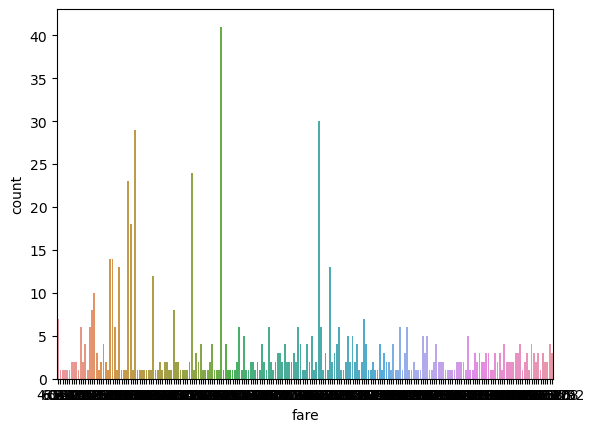

In [109]:
sns.countplot(x='fare', data=titanic)

### histplot
- histplot : 히스토그램, bins 설정
- 연속적인 값을 구간 별로 잘라서 유의미한 값을 생성함

<Axes: xlabel='fare', ylabel='Count'>

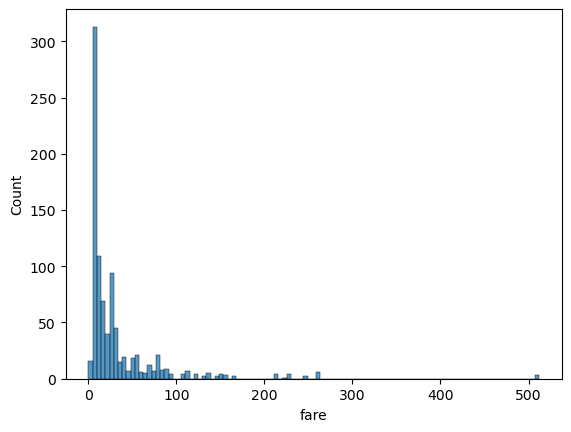

In [258]:
sns.histplot(x='fare', data=titanic)

<Axes: xlabel='fare', ylabel='Count'>

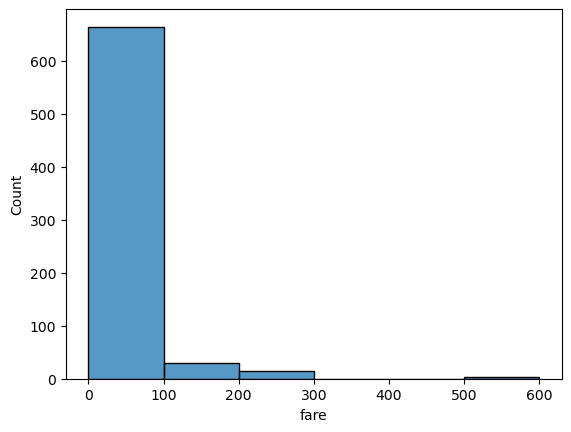

In [113]:
# bins 정의 
sns.histplot(x='fare', data=titanic, bins=[0,100,200,300,400,500,600]) # 또는 bins=갯수

## 7) 결측치, 오류 데이터 처리 

- 특이치 : 실제 데이터 값이 특이하게 크거나 작거나, 주로 numeric에서 
    - 원칙은 아웃라이어 기준으로 판단해야.. 
    - quantile (0.99) 값 등으로 대체 하기도 함
- 결측치 : 데이터 값이 없는 것 , NA라고도 함
    - 해당 레코드를 삭제하거나
    - 통계 시 (통계란 column 단위로 이뤄짐) 해당값 빼고 계산
    - 대체 값 (평균, 중간값, 임의값, random 값) 을 만들어 넣기
    - column 별로 통계를 내는 것이기 때문에 결측치가 있어도 상관없다. 엉뚱한 값을 억지로 넣는 것 보다는.. 
            - 다만, paired value analysis (같은 레코드의 두 값을 비교 ) 하는 경우는 결측치가 있으면 안됨
- 오류 : 쓰레기 값이 들어있는 경우 
    - cleansing 이 필요: 원래 값을 살릴 수 있으면 살리고, 아니면 NA화 후 처리 
        - whitespace제거 등등
        - 같은 항목으로 count될 수 있게
    - 혈액형 A, B, O, AB 만 있어야 <= category의 경우 프로그램적으로 거를 수 있다


### 결측치 (NA) 처리
- 결측치 찾기 : isnull()
- 값 넣기 :  fillna ( 넣을값 ) 
- 결측치 포함 행 (레코드) 삭제 : dropna( subset=[체크할 컬럼명] ) 

In [123]:
# 결측 통계

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           530
embark_town      0
alive            0
alone            0
combined         0
dtype: int64

In [157]:
# 삭제하기 : 레코드 단위

titanic = titanic.dropna(subset=['age'])
titanic
titanic.age.median()

28.0

In [132]:
# age 결측치 중간 값으로 채워넣기 : column 값을 다시 만들어서 assign 하는 것에 주의
import seaborn as sns

titanic = sns.load_dataset("titanic")

titanic.age = titanic.age.fillna(titanic.age.median())

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


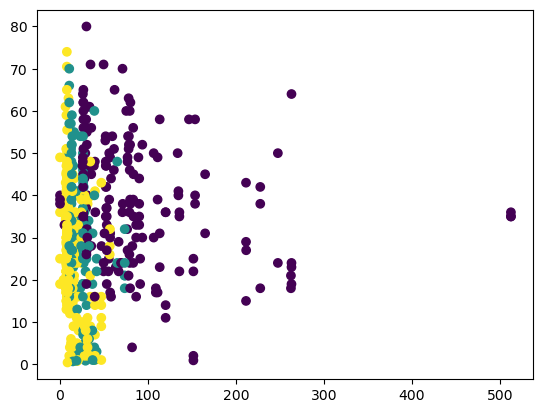

In [259]:
import matplotlib.pyplot as plt
plt.scatter("fare", "age", c="pclass", data=titanic)

In [128]:
titanic.age.median()

28.0

In [129]:
# int 변환시 오류 안 남
titanic.age.astype(int).min()

0

In [130]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 과제 5 : fare 를 0.99 로 상단처리 (더 큰 값은 0.99 quantile 값으로 대체)하시오

In [56]:
ceiling = titanic.fare.quantile(0.99)
titanic.loc[titanic.fare > ceiling, 'fare']= ceiling
titanic.fare.max()

249.00622000000035

### category 세팅

- 컬럼.unique() : unique 값 조회
- pd.Categorical( 컬럼 , categories=[값, 값, 값 .. ] )  # 정해진 값 이외에는 NaN 으로 처리

In [159]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [161]:
pd.Categorical(titanic.who, categories=["man", "woman"]).unique()  # 나머지는 NaN으로 만듦

['man', 'woman', NaN]
Categories (2, object): ['man', 'woman']

### 과제 6 :  출발지가  Southampton 과 Cherbourg 만 있다고 가정하고 data cleansing 하시오 

In [57]:
titanic['embark_town'] = pd.Categorical(titanic.embark_town, categories=["Southampton", "Cherbourg"])
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Name: embark_town, dtype: int64

## 통계적 추정

- 빅데이터 : 전체 (투표) , 통계 : 샘플 (여론조사)
- 샘플 -> 전체를 추정 (여론 조사) 
    - 샘플통계 : 샘플 1000명을 조사 해본 결과 400명이 지지했다
    - 점추정 : 전체 인구의 지지율도 40% 일 것이다
    - 구간 추정
        - 여론조사 결과 40% (95% 신뢰 구간에서 ±4% 오차)
        - = 모집단(전체 인구) 의 (실제)지지율은 95%의 확률로 40%±4% 인 36%~44% 사이에 있을 것이다. 
        - = 36~44% 사이에 있을 확률이 95%
        - = 5%의 가능성으로 36% 보다 작거나 44% 보다 클 수 있다.
    
    
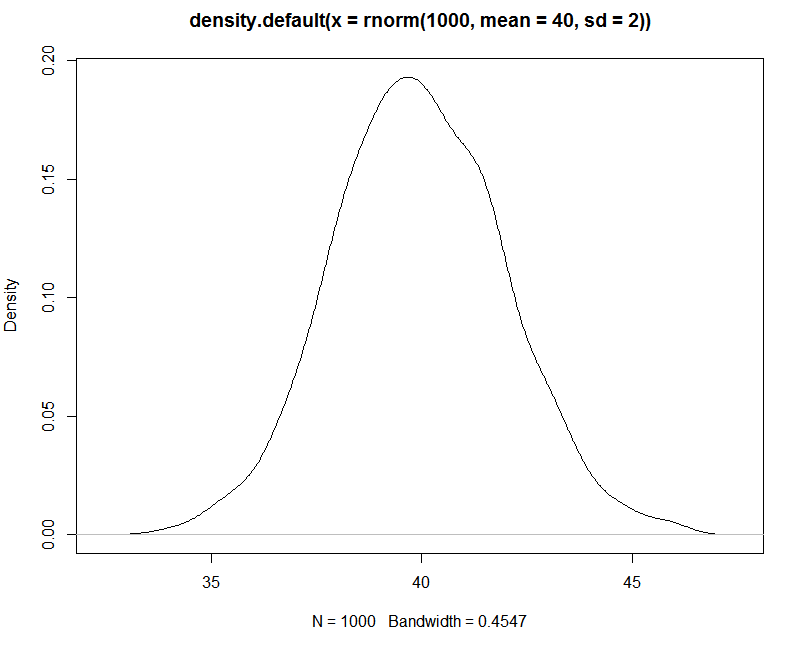

## 신뢰구간 구하기 (추정)

- import scipy.stats as st
- 30 개 이하의 샘플 :  st.t.interval(alpha=신뢰구간, df=샘플 갯수-1, loc=평균, scale=평균오차)
- 30 개 이상 : st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
- 샘플 뽑기 : df.sample( n=샘플갯수 or frac= 샘플비율)

In [5]:
import scipy.stats as st
import numpy as np

sample1=titanic.sample(n=20, random_state=1 )
sample2=titanic.sample(frac=0.6, random_state=1)

print ("sample1:", np.mean(sample1.fare), st.t.interval(confidence=0.95, df=len(sample1)-1, loc=np.mean(sample1.fare), scale=st.sem(sample1.fare)))
print ("sample2:", np.mean(sample2.fare), st.norm.interval(confidence=0.95, loc=np.mean(sample2.fare), scale=st.sem(sample2.fare)))
print ("population:", np.mean(titanic.fare))

sample1: 22.448330000000002 (13.292508862305205, 31.6041511376948)
sample2: 34.85394000000001 (30.051009611771494, 39.656870388228526)
population: 32.204207968574636


## 평균비교

- 2개의 평균이 있을 때, 샘플에서는 평균이 차이가 나는데 실제 모집단에서도 차이가 날지 분석
- one sample t-test :  1개의 기준값 (ex, 지난 선거에서 지지율) 이 주어져 있고, 샘플 데이터 (ex. 이번달 여론조사 데이터) 가 주어진 경우, 유의미한 차이가 있나?
- 가설 검정
    - 가설 : 실제 모집단에서는 차이가 없다 
    - 검정 : 가설이 맞는지 판단하는 절차 
- 예 
    - 키 크는 약이 효과가 있는지.. 약을 먹인 몇 명의 결과를 놓고 판단하고자 함
    - 원래 중학교 2학년 인구의 키 평균 = 164
    - 1학년부터 약먹은 2학년(샘플) 평균 = 167 
    - 영가설 : 원래 키에서 변동이 없다 (샘플에서만 평균이 높게 나왔을 뿐) 
    - 검정 : 샘플로 추정할 수 있는 모집단의 신뢰구간 (전체 중학생에게 약을 먹였을 때, 그 평균은 95%의 확률로 이 구간내에 있을 것이다) 안에 원래 평균(164) 이 있다면, 영가설이 맞다 (변동이 없다=효과가 없다)  
    - 만약 검정 결과 원래 평균이 신뢰 구간 밖이라면, 영가설 기각 (변동이 있다)
    - 평균값이 => 통계적으로 유의미한 차이가 있다.

- st.ttest_1samp(데이터, 비교평균)
    - pvalue < 0.05 이면 영가설 기각 (아니면 영가설이 맞음)

In [27]:
# 샘플 집단에 기준 값이 포함될 확률
# pvalue < 0.05 -> 5% 미만이면 포함되지 않음

st.ttest_1samp(sample2.fare, 20) # 샘플 집단의 배 삯 평균은 20

TtestResult(statistic=6.061546821472223, pvalue=2.5500083564312303e-09, df=534)

## 도수비교

- nominal 데이터의 값 별 분포가 차이가 있는가? (샘플에서 그렇게 나왔는데 전체도 그렇다고 추정할 수 있나?)
- 특정 혈액형이 더 많은가?  
- 가설 : 혈액형 분포는 같다 = 고르게 분포한다 (영가설)
- 검정 : chisquare ( 데이터 ) 
    - 실제 분포가 균등한데, 샘플이 이렇게 나올 확률을 얻음
    - if pvalue < 0.05  전체도 다르다고 추정할 수 있음
    - 카테코리 별로 => 통계적으로 유의미한 차이가 있다.
    

In [32]:
# chisqaure 사용법 -> 분포의 차이가 있는가?
from scipy.stats import chisquare
chisquare ([10, 12, 13, 5])  # 원래는 균등 분포인데, 샘플에서만 우연히 이렇게 차이나왔을 가능성 28%

Power_divergenceResult(statistic=3.8, pvalue=0.2838861307598272)

In [23]:
# 샘플이 커지면 
chisquare ([100, 120, 130, 50]) # 원래는 균등 분포인데, 이렇게 큰 샘플에서 우연히 이렇게 차이가 많이 나게 나올 가능성 0.000002 %

Power_divergenceResult(statistic=38.0, pvalue=2.8264748814532456e-08)

In [28]:
# titanic data에 적용 
num_class=sample1["class"].value_counts()
print(num_class)
print(chisquare(num_class))
# pvalue가 적당히 큼 -> 통계적으로 유의미한 차이가 있음

Third     10
First      5
Second     5
Name: class, dtype: int64
Power_divergenceResult(statistic=2.5, pvalue=0.2865047968601901)


In [33]:
num_class=sample2["class"].value_counts()
print(num_class)
print(chisquare (num_class))
# 샘플의 개수가 큼, pvalue가 매우 작음 -> 통계적으로 유의미한 차이가 없음

Third     291
First     138
Second    106
Name: class, dtype: int64
Power_divergenceResult(statistic=109.6411214953271, pvalue=1.5550092344918782e-24)


### 과제 7 : 여객선 들의 승객의 출발 도시의 차이가 통계적으로 유의한 수준인지 타이타닉 데이터를 통해 판정하시오 

In [37]:
# 타이타닉 데이터를 기반으로 다른 여객선의 분포를 추정할 수 있는가?
num_embark_town=titanic["embark_town"].value_counts()
print(num_embark_town)
print(chisquare(num_embark_town))
# pvalue가 0.05 보다 작으므로 통계적으로 유의미한 차이가 없음, 분포가 균일하지 않음

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Power_divergenceResult(statistic=625.8110236220473, pvalue=1.2789773792558722e-136)


###  over sampling
- 단순히 copy (duplication) 하는 방법 
- 원래 통계분포를 유지하며 데이터 생성
    - 원래 데이터 분포를 학습하여 모델만들기
    - 모델로 부터 데이터 생성(재현)


## 정리

- sampling 
    - under sampling : random, 층화 추출
    - over sampling : syntheic data 
- 변수 1개 = column 1개 =한가지 데이터 에 대한 분석 
    - nominal : 개수, portion, 차트 
    - numeric : 기술통계, plotting
- 문제 데이터 처리
    - 결측치
    - 이상치
    - outlier
- 가설 검정(pvalue < 0.05)
    - numeric : 평균비교 = t.test
    - nominal : 분포 = chisquare
